# CNRR reanalysis data for the Tibetan Plateau region 

In [17]:
# Import a range of python libraries used in this notebook:
import iris
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import urllib,zipfile
import datetime
from netCDF4 import Dataset
%matplotlib inline

##  Analysis possible for parameters:


for background conditions 


-  uwd, vwd
-  water vapor mixing ratio 



for tracking 

-  CNRR GSISAT hourly surface rain rates 

In [598]:
path='/media/juli/Data/third_pole/CNRR/data/'
file= 'cnrr_cnrr_199701_TP.nc4.nc4'
file = 'substring.nc4'
ds = Dataset(path + file)
print(path+file)

/media/juli/Data/third_pole/CNRR/data/substring.nc4


In [602]:
# read in lats and lons information to add to the iris cubes 
precip = np.array(ds['prcp'])
lats = np.array(ds['LAT'])
lons = np.array(ds['LON'])

In [606]:
Precip = iris.load_cube(path+file, "prcp")

In [607]:
import iris.coords
## ad 2d lats and lons with aux coords 
aux_lats = iris.coords.AuxCoord(lats, standard_name='latitude', long_name='latitude')
aux_lons = iris.coords.AuxCoord(lons, standard_name='longitude', long_name='longitude')
Precip.add_aux_coord(aux_lats, [1,2])
Precip.add_aux_coord(aux_lons, [1,2])

In [608]:
coord_lats = iris.coords.DimCoord(lats[:,0], standard_name='latitude', long_name='lats', var_name='lats' )
coord_lons = iris.coords.DimCoord(lons[0,:], standard_name='longitude', long_name='lons', var_name='lons')
#Precip.add_dim_coord(coord_lats, 1)
#Precip.add_dim_coord(coord_lons, 2)

In [609]:
Precip

<iris 'Cube' of prcp / (mm/hr) (time: 720; -- : 141; -- : 201)>

In [521]:
import tobac 
dxy,dt=tobac.get_spacings(Precip, grid_spacing = 18000.0) # grid spacing needs to be given as input! 

Available coordinates:     ['time', 'latitude', 'longitude']


# Test run on simple example 

## Feature detection 

In [532]:
# Dictionary containing keyword options (could also be directly given to the function)
parameters_features={}
parameters_features['position_threshold']='weighted_diff' # diff between specific value and threshold for weighting when finding the center location (instead of just mean lon/lat)
parameters_features['min_num']=3 #? 
parameters_features['min_distance']=0 # minimum distance between features 

parameters_features['sigma_threshold']=0.5 # for slightly smoothing (gaussian filter)
parameters_features['n_erosion_threshold']=0 # pixel erosion (for more robust results)

parameters_features['threshold']=[1,2,3,4,5,7,10,15] #mm/h, step-wise threshold for feature detection 
parameters_features['n_min_threshold']=10 # minimum nr of contiguous pixels for thresholds, 10 pixels = ca. 2000 km2



In [533]:
# Feature detection based on based on surface precipitation field and a range of thresholds
print('starting feature detection based on multiple thresholds')
Features=tobac.feature_detection_multithreshold(Precip,dxy,**parameters_features)
print('feature detection done')

starting feature detection based on multiple thresholds
feature detection done


In [307]:
#Set up directory to save output and plots:
savedir='Save'
os.makedirs(savedir,exist_ok=True)
plot_dir="Plot"
os.makedirs(plot_dir,exist_ok=True)
Features.to_hdf(os.path.join(savedir,'Features.h5'),'table')
print('features saved')

features saved


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


## Segmentation

In [308]:
# Dictionary containing keyword arguments for segmentation step:
parameters_segmentation={}
parameters_segmentation['method']='watershed'
parameters_segmentation['threshold']=1 

In [309]:
# Perform Segmentation and save resulting mask to NetCDF file:
print('Starting segmentation based on surface precipitation')
Mask,Features_Precip=tobac.segmentation_2D(Features,Precip,dxy,**parameters_segmentation)
print('segmentation based on surface precipitation performed, start saving results to files')
iris.save([Mask],os.path.join(savedir,'Mask_Segmentation_precip.nc'),zlib=True,complevel=4)                
Features_Precip.to_hdf(os.path.join(savedir,'Features_Precip.h5'),'table')
print('segmentation surface precipitation performed and saved')







Starting segmentation based on surface precipitation
segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved


In [339]:
timestamp = Track.loc[Track['timestr'] == '1997-11-01 05:00:00']
np.unique(timestamp.cell)
timestamp.loc[timestamp['ncells']== 0]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,ncells,cell,time_cell
623,5,21,12.544383,466.164733,22,1,624,1997-11-01 05:00:00,1997-11-01 05:00:00,0,NaN,NaT
625,5,37,16.586003,175.559809,15,1,626,1997-11-01 05:00:00,1997-11-01 05:00:00,0,307.0,00:00:00
639,5,187,77.035841,470.141299,36,1,640,1997-11-01 05:00:00,1997-11-01 05:00:00,0,60.0,05:00:00
641,5,199,79.838488,449.537637,14,1,642,1997-11-01 05:00:00,1997-11-01 05:00:00,0,235.0,02:00:00
645,5,233,99.771534,438.638584,33,1,646,1997-11-01 05:00:00,1997-11-01 05:00:00,0,NaN,NaT
646,5,239,98.808872,445.967155,70,1,647,1997-11-01 05:00:00,1997-11-01 05:00:00,0,276.0,01:00:00
647,5,243,96.267986,466.876289,11,1,648,1997-11-01 05:00:00,1997-11-01 05:00:00,0,NaN,NaT
650,5,278,126.068404,50.745161,44,1,651,1997-11-01 05:00:00,1997-11-01 05:00:00,0,280.0,01:00:00
654,5,316,157.849041,120.213399,19,1,655,1997-11-01 05:00:00,1997-11-01 05:00:00,0,242.0,02:00:00
678,5,161,102.869278,11.113898,12,2,679,1997-11-01 05:00:00,1997-11-01 05:00:00,0,323.0,00:00:00


# Tracking

In [535]:
# Dictionary containing keyword arguments for the linking step:
parameters_linking={}

parameters_linking['adaptive_stop']=0.2
parameters_linking['adaptive_step']=0.95
parameters_linking['extrapolate']=0
parameters_linking['order']=1
parameters_linking['subnetwork_size']= 100 # maximum size of subnetwork used for linking 
parameters_linking['memory']=0
#parameters_linking['time_cell_min']=5*60
parameters_linking['time_cell_min']= 6*dt 
parameters_linking['method_linking']='predict'
#parameters_linking['method_detection']='threshold'
parameters_linking['v_max']= 10
#parameters_linking['d_min']=2000
parameters_linking['d_min']=4*dxy # four times the grid spacing  (! seems to be important for GPM data)

In [536]:
# Perform trajectory linking using trackpy and save the resulting DataFrame:
Track=tobac.linking_trackpy(Features,Precip,dt=dt,dxy=dxy,**parameters_linking)
Track.to_hdf(os.path.join(savedir,'Track1.h5'),'table')


Frame 719: 109 trajectories present.


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


# Chunking 

In [615]:
# get list with all files by month
import glob
file_list= glob.glob('/media/juli/Data/third_pole/CNRR/data/*TP*.nc4')  
print('files in dataset:  ', len(file_list))


files in dataset:   241


In [ ]:
for file in file_list:
    i = file[38::]
    print('start process for file.....', file)
    ## DATA PREPARATION
    Precip=iris.load_cube(file,'prcp')

    ## ad 2d lats and lons with aux coords 
    import iris.coords
    aux_lats = iris.coords.AuxCoord(lats, standard_name='latitude', long_name='latitude')
    aux_lons = iris.coords.AuxCoord(lons, standard_name='longitude', long_name='longitude')
    Precip.add_aux_coord(aux_lats, [1,2])
    Precip.add_aux_coord(aux_lons, [1,2])

    # FEATURE DETECTION
    print('starting feature detection based on multiple thresholds')
    Features=tobac.feature_detection_multithreshold(Precip,dxy,**parameters_features)
    print('feature detection done')
    Features.to_hdf(os.path.join(savedir,'Features' + str(i) + '.h5'),'table')
    print('features saved')
    
    # SEGMENTATION 
    print('Starting segmentation based on surface precipitation')
    Mask,Features_Precip=tobac.segmentation_2D(Features,Precip,dxy,**parameters_segmentation)
    print('segmentation based on surface precipitation performed, start saving results to files')
    iris.save([Mask],os.path.join(savedir,'Mask_Segmentation_precip' + str(i) + '.nc'),zlib=True,complevel=4)                
    Features_Precip.to_hdf(os.path.join(savedir,'Features_Precip' + str(i) + '.h5'),'table')
    print('segmentation surface precipitation performed and saved')

start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200103_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200104_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200105_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200106_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200107_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200108_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200109_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200110_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200111_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200112_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200201_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200202_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200203_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200204_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200309_TP.nc4.nc4
starting feature detection based on multiple thresholds


# TODO

- add lats and lons to features

- check histograms for precip data and look at basic patterns (to choose right parameters)

- test tracking for entire datasets 

- clean notebook 

In [352]:
a = [] 
for c in np.unique(Track.cell):
    a.append(np.shape(Track.loc[Track['cell'] == c ])[0])


In [373]:
arr = np.array(a)
idx = np.where(arr == 159 )[0]
arr2 = np.unique(Track.cell)
index = arr2[idx]

array([1190])

In [381]:
track1 = Track.loc[Track['cell']== 2108.0] 

## Plotting

In [539]:
# Set extent of maps created in the following cells:
axis_extent=[70,105,27,45] 

FileNotFoundError: [Errno 2] No such file or directory: 'SavePlot/tracks_TP.png'

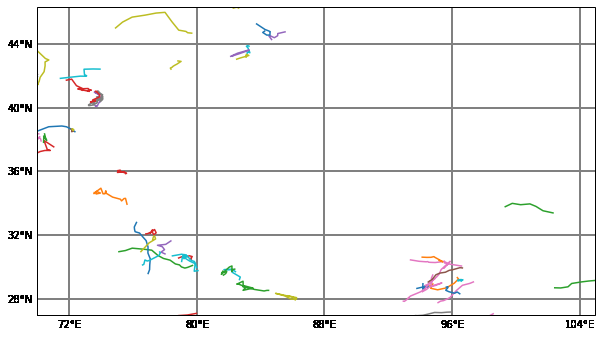

In [542]:
# Plot map with all individual tracks:
import cartopy.crs as ccrs
fig_map,ax_map=plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax_map=tobac.map_tracks(Track,axis_extent=axis_extent,axes=ax_map)

In [547]:
plt.savefig(plot_dir+ '/tracks_TP.png')

<Figure size 432x288 with 0 Axes>

In [23]:
print(np.shape(lats), np.shape(lons), np.shape(precip))

(360, 480) (360, 480) (744, 360, 480)


In [60]:
from iris.cube import Cube
help(Cube.add_aux_coord)

Help on function add_aux_coord in module iris.cube:

add_aux_coord(self, coord, data_dims=None)
    Adds a CF auxiliary coordinate to the cube.
    
    Args:
    
    * coord
        The :class:`iris.coords.DimCoord` or :class:`iris.coords.AuxCoord`
        instance to add to the cube.
    
    Kwargs:
    
    * data_dims
        Integer or iterable of integers giving the data dimensions spanned
        by the coordinate.
    
    Raises a ValueError if a coordinate with identical metadata already
    exists on the cube.
    
    See also :meth:`Cube.remove_coord()<iris.cube.Cube.remove_coord>`.

